In [3]:
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from lightgbm import LGBMClassifier
exp = ClassificationExperiment()


data = pd.read_csv('../../data/dataset.csv')

# shuffle the DataFrame rows
data = data.sample(frac = 1)
data.head()

s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
# best = compare_models(include=['lightgbm', 'rf'], exclude=['gbc'])
best = create_model(LGBMClassifier())


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(28909, 265)"
5,Transformed data shape,"(28909, 265)"
6,Transformed train set shape,"(20236, 265)"
7,Transformed test set shape,"(8673, 265)"
8,Numeric features,264
9,Rows with missing values,75.5%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8878,0.9766,0.8878,0.8871,0.8871,0.8314,0.8318
1,0.8923,0.9762,0.8923,0.8919,0.8919,0.8381,0.8382
2,0.8913,0.9767,0.8913,0.8909,0.8908,0.8366,0.8369
3,0.8913,0.9756,0.8913,0.8909,0.8908,0.8366,0.8369
4,0.8962,0.9780,0.8962,0.8962,0.8956,0.8439,0.8445
5,0.8977,0.9786,0.8977,0.8974,0.8973,0.8463,0.8465
6,0.9021,0.9816,0.9021,0.9022,0.9014,0.8528,0.8535
7,0.9041,0.9795,0.9041,0.9039,0.9038,0.8558,0.8560
8,0.8987,0.9791,0.8987,0.8984,0.8980,0.8476,0.8481


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

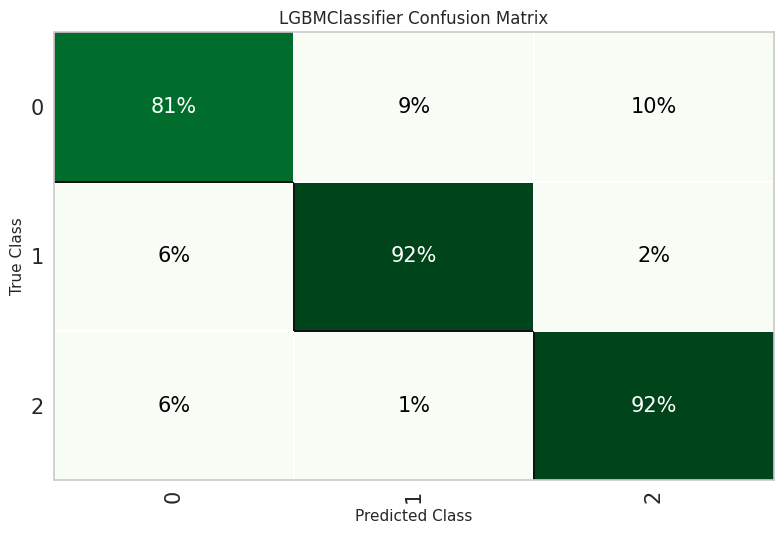

In [18]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

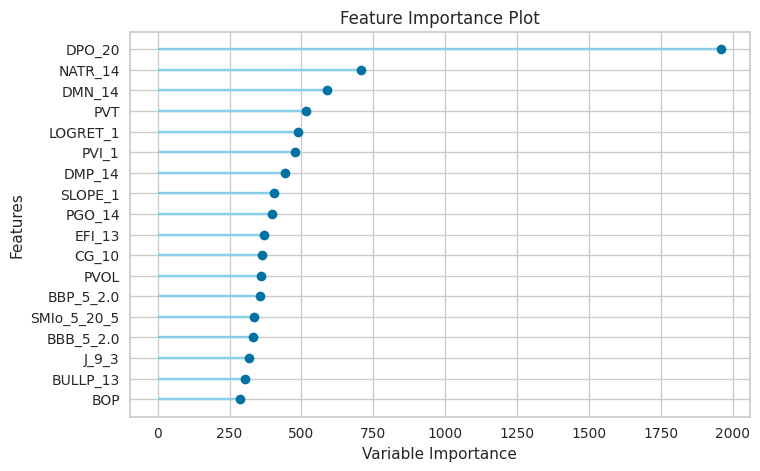

In [19]:
# plot AUC
# plot_model(best, plot = 'feature_all')

In [4]:
# save pipeline
model_name = 'ETHUSDT-15m-12-3'
save_model(best, f'../../models/{model_name}')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ABER_ZG_5_15', 'ABER_SG_5_15',
                                              'ABER_XG_5_15', 'ABER_ATR_5_15',
                                              'ACCBL_20', 'ACCBM_20', 'ACCBU_20',
                                              'AD', 'ADOSC_3_10', 'ADX_14',
                                              'DMP_14'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.00

In [21]:
# load pipeline
from pycaret.classification import *
import pandas as pd

model_name = 'ETHUSDT-15m-12-3'
loaded_best_pipeline = load_model(f'../../models/{model_name}')

Transformation Pipeline and Model Successfully Loaded


In [22]:
# create api
data = pd.read_csv('../../data/dataset.csv')
s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
create_api(loaded_best_pipeline, 'loaded_best_pipeline_api')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(20009, 265)"
5,Transformed data shape,"(20009, 265)"
6,Transformed train set shape,"(14006, 265)"
7,Transformed test set shape,"(6003, 265)"
8,Numeric features,264
9,Rows with missing values,75.6%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


In [6]:
!python3 loaded_best_pipeline_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [12534]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
^C
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [12534]


In [7]:
tst_df = pd.read_csv('../../data/unseen_dataset_droped.csv')
# orig_sigs = data[-100:]
# tst_df = tst_df.drop(columns = ['signal'], axis=1)
tst_df.tail()

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,TRUERANGE_1,TSI_13_25_13,TSIs_13_25_13,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,VHF_28,VIDYA_14,signal
57407,1666.958667,1670.409110,1663.508224,3.450443,1661.093603,1669.4170,1678.651103,7.078844e+07,-7383.052306,14.400213,...,2.02,0.417792,4.173001,-1,0.252422,32.084734,14.995398,0.338975,1669.416858,dont_trade
57408,1666.986667,1670.330414,1663.642920,3.343747,1661.403260,1669.4310,1678.460760,7.078557e+07,-7048.525820,14.137620,...,1.85,-0.193035,3.549282,1,0.267765,34.688715,12.124504,0.245828,1669.360914,dont_trade
57409,1666.927333,1670.156164,1663.698503,3.228830,1662.291431,1669.4545,1677.761431,7.077729e+07,-8902.683738,13.605118,...,1.62,-1.564283,2.818772,-1,0.290556,34.016779,10.196365,0.229465,1669.228550,dont_trade
57410,1666.902000,1670.055575,1663.748425,3.153575,1663.047390,1669.2115,1676.679890,7.077452e+07,-9733.614313,13.293213,...,2.10,-2.413053,2.071369,-1,0.305618,36.209368,7.859744,0.236160,1669.165967,dont_trade
57411,1666.900000,1670.010003,1663.789997,3.110003,1662.982575,1668.9380,1676.215075,7.077050e+07,-10468.473720,13.222975,...,2.50,-3.297781,1.304347,-1,0.323758,26.836409,7.181970,0.236081,1669.057581,dont_trade


In [8]:
predictions = predict_model(loaded_best_pipeline, data=tst_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8631,0.9552,0.8631,0.9286,0.8832,0.5314,0.5790


In [9]:
predictions

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,TSIs_13_25_13,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,VHF_28,VIDYA_14,signal,prediction_label,prediction_score
0,3687.580078,3708.447998,3666.711914,20.867968,3611.324707,3669.032471,3730.119873,65521044.0,-3479.933594,25.409054,...,-21.502321,1,1.019710,42.123608,881.741211,0.288344,3687.715576,0,long,0.8893
1,3688.706055,3709.137451,3668.274658,20.431437,3615.552490,3671.218506,3728.064941,65524928.0,-1832.907715,23.751293,...,-19.639313,1,0.846462,48.728615,761.264954,0.307186,3688.121826,0,long,0.5296
2,3692.766113,3713.380127,3672.152100,20.614008,3618.760010,3674.585938,3729.655029,65531864.0,1214.742188,23.210701,...,-17.554840,1,0.605001,53.936310,690.080444,0.294724,3689.576660,0,dont_trade,0.9225
3,3698.543213,3719.151855,3677.934814,20.608406,3624.218262,3679.403076,3732.423340,65534456.0,3175.646484,23.335535,...,-15.246571,1,0.444091,52.631153,713.118347,0.291727,3691.313965,0,dont_trade,0.9717
4,3706.894775,3727.088623,3686.700928,20.193846,3631.399902,3682.923096,3733.017334,65543532.0,6576.885254,23.451452,...,-12.787453,1,0.367048,57.588234,719.588440,0.309427,3692.838135,0,dont_trade,0.9747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57407,1666.958618,1670.409058,1663.508179,3.450443,1661.093628,1669.416992,1678.651123,70788440.0,-7383.052246,14.400213,...,4.173001,-1,0.252422,32.084736,14.995399,0.338975,1669.416870,0,dont_trade,0.9534
57408,1666.986694,1670.330444,1663.642944,3.343747,1661.403320,1669.431030,1678.460815,70785568.0,-7048.525879,14.137620,...,3.549282,1,0.267765,34.688713,12.124504,0.245828,1669.360962,0,dont_trade,0.9737
57409,1666.927368,1670.156128,1663.698486,3.228830,1662.291382,1669.454468,1677.761475,70777296.0,-8902.683594,13.605118,...,2.818772,-1,0.290556,34.016781,10.196365,0.229465,1669.228516,0,dont_trade,0.9042
57410,1666.901978,1670.055542,1663.748413,3.153575,1663.047363,1669.211548,1676.679932,70774520.0,-9733.614258,13.293213,...,2.071369,-1,0.305618,36.209370,7.859744,0.236160,1669.166016,0,dont_trade,0.9414


In [10]:
predictions['correct_signal'] = list(tst_df['signal'])
predictions.to_csv(f'../../data/predictions.csv', index=False)

In [11]:
d=tst_df.to_dict('records')
# orig_sig =  d.pop('signal')
d[0]

{'ABER_ZG_5_15': 3687.5799999999945,
 'ABER_SG_5_15': 3708.4479673090527,
 'ABER_XG_5_15': 3666.712032690936,
 'ABER_ATR_5_15': 20.867967309058272,
 'ACCBL_20': 3611.324824386468,
 'ACCBM_20': 3669.032500000017,
 'ACCBU_20': 3730.119824386471,
 'AD': 65521042.49658059,
 'ADOSC_3_10': -3479.933660507202,
 'ADX_14': 25.409052969210155,
 'DMP_14': 62.63097080635565,
 'DMN_14': 59.93402779759349,
 'ALMA_10_6.0_0.85': 3689.278331491164,
 'AMATe_LR_8_21_2': 1,
 'AMATe_SR_8_21_2': 0,
 'AO_5_34': -10.037352941159044,
 'OBV': -1367331.9320000082,
 'OBV_min_2': -1383121.413000008,
 'OBV_max_2': -1367331.9320000082,
 'OBVe_4': -1375482.106397709,
 'OBVe_12': -1380649.4564674506,
 'AOBV_LR_2': 1,
 'AOBV_SR_2': 0,
 'APO_12_26': 6.15544871796692,
 'AROOND_14': 14.285714285714286,
 'AROONU_14': 50.0,
 'AROONOSC_14': 35.714285714285715,
 'ATRr_14': 20.93203549873353,
 'BBL_5_2.0': 3674.7050487838414,
 'BBM_5_2.0': 3686.8500000000254,
 'BBU_5_2.0': 3698.994951216209,
 'BBB_5_2.0': 0.658825350431064,
 '

1000

In [13]:
import requests
import json 


d=tst_df.to_dict('records')

for i in range(1,5, 1):
    orignal_signal = d[i].pop('signal')
    dta=d[i]
    jsn = json.dumps(dta) 

    url = 'http://localhost:8000/predict'
    r = requests.post(url, json=jsn)
    print('r', r)


r <Response [422]>
r <Response [422]>
r <Response [422]>
r <Response [422]>


In [15]:
k=["ABER_ZG_5_15","ABER_SG_5_15","ABER_XG_5_15","ABER_ATR_5_15","ACCBL_20","ACCBM_20","ACCBU_20","AD","ADOSC_3_10","ADX_14","DMP_14","DMN_14","ALMA_10_6.0_0.85","AMATe_LR_8_21_2","AMATe_SR_8_21_2","AO_5_34","OBV","OBV_min_2","OBV_max_2","OBVe_4","OBVe_12","AOBV_LR_2","AOBV_SR_2","APO_12_26","AROOND_14","AROONU_14","AROONOSC_14","ATRr_14","BBL_5_2.0","BBM_5_2.0","BBU_5_2.0","BBB_5_2.0","BBP_5_2.0","BIAS_SMA_26","BOP","AR_26","BR_26","CCI_14_0.015","CDL_2CROWS","CDL_3BLACKCROWS","CDL_3INSIDE","CDL_3LINESTRIKE","CDL_3OUTSIDE","CDL_3STARSINSOUTH","CDL_3WHITESOLDIERS","CDL_ABANDONEDBABY","CDL_ADVANCEBLOCK","CDL_BELTHOLD","CDL_BREAKAWAY","CDL_CLOSINGMARUBOZU","CDL_CONCEALBABYSWALL","CDL_COUNTERATTACK","CDL_DARKCLOUDCOVER","CDL_DOJI_10_0.1","CDL_DOJISTAR","CDL_DRAGONFLYDOJI","CDL_ENGULFING","CDL_EVENINGDOJISTAR","CDL_EVENINGSTAR","CDL_GAPSIDESIDEWHITE","CDL_GRAVESTONEDOJI","CDL_HAMMER","CDL_HANGINGMAN","CDL_HARAMI","CDL_HARAMICROSS","CDL_HIGHWAVE","CDL_HIKKAKE","CDL_HIKKAKEMOD","CDL_HOMINGPIGEON","CDL_IDENTICAL3CROWS","CDL_INNECK","CDL_INSIDE","CDL_INVERTEDHAMMER","CDL_KICKING","CDL_KICKINGBYLENGTH","CDL_LADDERBOTTOM","CDL_LONGLEGGEDDOJI","CDL_LONGLINE","CDL_MARUBOZU","CDL_MATCHINGLOW","CDL_MATHOLD","CDL_MORNINGDOJISTAR","CDL_MORNINGSTAR","CDL_ONNECK","CDL_PIERCING","CDL_RICKSHAWMAN","CDL_RISEFALL3METHODS","CDL_SEPARATINGLINES","CDL_SHOOTINGSTAR","CDL_SHORTLINE","CDL_SPINNINGTOP","CDL_STALLEDPATTERN","CDL_STICKSANDWICH","CDL_TAKURI","CDL_TASUKIGAP","CDL_THRUSTING","CDL_TRISTAR","CDL_UNIQUE3RIVER","CDL_UPSIDEGAP2CROWS","CDL_XSIDEGAP3METHODS","open_Z_30_1","high_Z_30_1","low_Z_30_1","close_Z_30_1","CFO_9","CG_10","CHOP_14_1_100","CKSPl_10_3_20","CKSPs_10_3_20","CMF_20","CMO_14","COPC_11_14_10","CTI_12","LDECAY_5","DEC_1","DEMA_10","DCL_20_20","DCM_20_20","DCU_20_20","DPO_20","EBSW_40_10","EFI_13","EMA_10","ENTP_10","ER_10","BULLP_13","BEARP_13","FISHERT_9_1","FISHERTs_9_1","FWMA_10","HA_open","HA_high","HA_low","HA_close","HILO_13_21","HILOs_13_21","HL2","HLC3","HMA_10","HWM","HWU","HWL","HWMA_0.2_0.1_0.1","ISA_9","ISB_26","ITS_9","IKS_26","ICS_26","INC_1","INERTIA_20_14","JMA_7_0","KAMA_10_2_30","KCLe_20_2","KCBe_20_2","KCUe_20_2","K_9_3","D_9_3","J_9_3","KST_10_15_20_30_10_10_10_15","KSTs_9","KURT_30","KVO_34_55_13","KVOs_34_55_13","LR_14","LOGRET_1","MACD_12_26_9","MACDh_12_26_9","MACDs_12_26_9","MAD_30","MASSI_9_25","MCGD_10","MEDIAN_30","MFI_14","MIDPOINT_2","MIDPRICE_2","MOM_10","NATR_14","NVI_1","OHLC4","PDIST","PCTRET_1","PGO_14","PPO_12_26_9","PPOh_12_26_9","PPOs_12_26_9","PSARs_0.02_0.2","PSARaf_0.02_0.2","PSARr_0.02_0.2","PSL_12","PVI_1","PVO_12_26_9","PVOh_12_26_9","PVOs_12_26_9","PVOL","PVR","PVT","PWMA_10","QQE_14_5_4.236","QQE_14_5_4.236_RSIMA","QQEs_14_5_4.236","QS_10","QTL_30_0.5","RMA_10","ROC_10","RSI_14","RSX_14","RVGI_14_4","RVGIs_14_4","RVI_14","SINWMA_14","SKEW_30","SLOPE_1","SMA_10","SMI_5_20_5","SMIs_5_20_5","SMIo_5_20_5","SQZ_20_2.0_20_1.5","SQZ_ON","SQZ_OFF","SQZ_NO","SQZPRO_20_2.0_20_2_1.5_1","SQZPRO_ON_WIDE","SQZPRO_ON_NORMAL","SQZPRO_ON_NARROW","SQZPRO_OFF","SQZPRO_NO","SSF_10_2","STC_10_12_26_0.5","STCmacd_10_12_26_0.5","STCstoch_10_12_26_0.5","STDEV_30","STOCHk_14_3_3","STOCHd_14_3_3","STOCHRSIk_14_14_3_3","STOCHRSId_14_14_3_3","SUPERT_7_3.0","SUPERTd_7_3.0","SUPERTs_7_3.0","SWMA_10","T3_10_0.7","TEMA_10","THERMO_20_2_0.5","THERMOma_20_2_0.5","THERMOl_20_2_0.5","THERMOs_20_2_0.5","TOS_STDEVALL_LR","TOS_STDEVALL_L_1","TOS_STDEVALL_U_1","TOS_STDEVALL_L_2","TOS_STDEVALL_U_2","TOS_STDEVALL_L_3","TOS_STDEVALL_U_3","TRIMA_10","TRIX_30_9","TRIXs_30_9","TRUERANGE_1","TSI_13_25_13","TSIs_13_25_13","TTM_TRND_6","UI_14","UO_7_14_28","VAR_30","VHF_28","VIDYA_14","signal"]
v=[3687.5799999999945,3708.4479673090527,3666.712032690936,20.867967309058272,3611.324824386468,3669.032500000017,3730.119824386471,65521042.49658059,-3479.933660507202,25.409052969210155,62.63097080635565,59.93402779759349,3689.278331491164,1,0,-10.037352941159044,-1367331.9320000082,-1383121.413000008,-1367331.9320000082,-1375482.106397709,-1380649.4564674506,1,0,6.15544871796692,14.285714285714286,50.0,35.714285714285715,20.93203549873353,3674.7050487838414,3686.8500000000254,3698.994951216209,0.658825350431064,0.6914375742315951,0.0036662748723201,0.5182335229173586,107.40940465918868,107.6931384548925,62.76106495885049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.3457892774074078,0.2479076194096454,0.0147709366543045,0.2221875875764993,0.2011889174831016,-5.501139695412197,49.86603685677605,3693.42055245544,3686.532573422529,-0.1935421945941069,-0.1776013452384175,1.7933321244595195,0.3221316093245174,3691.5,0,3686.722878502072,3621.32,3666.94,3712.56,-15.526000000018485,-0.0422939452473113,34890.20003917595,3683.435707280316,3.328994086360548,0.0988188976377954,22.95399137788172,-6.936008622118152,0.2337000528811061,0.4745251480741029,3686.591468531468,3685.6945159217967,3705.9,3676.01,3687.355,3660.062380952385,0.0,3690.955,3691.1366666666663,3685.930312823639,3683.404312046014,3723.123617178437,3643.685006913591,3683.404312046014,3754.29,3749.975,3692.185,3673.06,3722.72,1,56.61122189387154,3686.5708596588856,3674.188245182835,3643.863308190617,3685.949493771534,3728.035679352451,47.52770064404504,54.79040285749505,33.002296217145016,-1269.1922942519727,-2014.5161976675367,-0.5731707547725625,404.1111393726701,-432.2438550303832,3693.6684395604393,0.004202234342034,-7.903895029191062,5.670355148252716,-13.574250177443778,23.95351111111112,25.653146527335583,3684.30958872429,3687.96,64.67777634567902,3683.76,3688.855,10.039999999999964,0.5670333332990256,1808.631373464297,3687.355,44.29999999999973,0.004211076109488,0.6393260089112232,0.1673578839206137,0.5153864926640161,-0.3480286087434023,0.0,0.08,0,66.66666666666667,632.3471299634457,-18.83407843357245,-3.4958119069297027,-15.338266526642752,58286869.1115,1.0,-67499657.0528175,3684.721875,40.276708048702105,47.64399628093013,0.0,0.9980000000000018,3687.96,3685.26360290012,0.2727178890983506,49.91119932738079,60.30121828890395,0.1214138286893708,0.130026231117645,54.11788781389416,3681.8483957219214,-0.0134341431920497,15.480000000000018,3686.949999999987,0.0012892489078579,-0.0207929382950865,0.0220821872029445,40.52333333333339,0,1,0,40.52333333333339,1,0,0,0,0,3685.83876198716,0.0,-7.903895029191062,0.0,29.694128005254186,67.46471774193407,68.85728577904662,86.99834168792432,86.59451062765457,3708.610761541737,-1,3708.610761541737,3685.9253333333336,3672.791368217953,3691.757649478132,13.150000000000093,11.727198660713006,1,1,1772.5507213830556,603.8025756374843,2941.2988671286266,-564.9455701080869,4110.047012874198,-1733.693715853658,5278.795158619769,3685.925333333396,-0.0410784450391554,-0.0374537058159756,29.889999999999876,-10.631256198880749,-21.502320437506764,1,1.0197097114445768,42.123605842217664,881.7412379924208,0.2883439173568239,3687.715598051617,"dont_trade"]
dta={}
url='http://localhost:8000/predict?'
for idx in range(len(k)):
    url += f'{k[idx]}={v[idx]}&'
    

In [17]:
dta={
  "ABER_ZG_5_15": 216.10800170898438,
  "ABER_SG_5_15": 219.62347412109375,
  "ABER_XG_5_15": 212.592529296875,
  "ABER_ATR_5_15": 3.515470027923584,
  "ACCBL_20": 216.3528289794922,
  "ACCBM_20": 223.86300659179688,
  "ACCBU_20": 232.1478271484375,
  "AD": 2755964.25,
  "ADOSC_3_10": -53300.19921875,
  "ADX_14": 35.08140563964844,
  "DMP_14": 4.255819320678711,
  "DMN_14": 18.191299438476562,
  "ALMA_10_6.0_0.85": 226.1650848388672,
  "AMATe_LR_8_21_2": 0,
  "AMATe_SR_8_21_2": 1,
  "AO_5_34": -8.847823143005371,
  "OBV": 417238.5,
  "OBV_min_2": 355986.875,
  "OBV_max_2": 417238.5,
  "OBVe_4": 433619.625,
  "OBVe_12": 513148.28125,
  "AOBV_LR_2": 0,
  "AOBV_SR_2": 1,
  "APO_12_26": -3.562051296234131,
  "AROOND_14": 92.85713958740234,
  "AROONU_14": 50,
  "AROONOSC_14": -42.85714340209961,
  "ATRr_14": 3.5491576194763184,
  "BBL_5_2.0": 209.7469482421875,
  "BBM_5_2.0": 215.57200622558594,
  "BBU_5_2.0": 221.3970489501953,
  "BBB_5_2.0": 5.404277801513672,
  "BBP_5_2.0": 0.45519354939460754,
  "BIAS_SMA_26": -0.044987864792346954,
  "BOP": 0.6513888835906982,
  "AR_26": 56.03158950805664,
  "BR_26": 55.91716003417969,
  "CCI_14_0.015": -122.05522918701172,
  "CDL_2CROWS": 0,
  "CDL_3BLACKCROWS": 0,
  "CDL_3INSIDE": 0,
  "CDL_3LINESTRIKE": 0,
  "CDL_3OUTSIDE": 0,
  "CDL_3STARSINSOUTH": 0,
  "CDL_3WHITESOLDIERS": 0,
  "CDL_ABANDONEDBABY": 0,
  "CDL_ADVANCEBLOCK": 0,
  "CDL_BELTHOLD": 100,
  "CDL_BREAKAWAY": 0,
  "CDL_CLOSINGMARUBOZU": 0,
  "CDL_CONCEALBABYSWALL": 0,
  "CDL_COUNTERATTACK": 0,
  "CDL_DARKCLOUDCOVER": 0,
  "CDL_DOJI_10_0.1": 0,
  "CDL_DOJISTAR": 0,
  "CDL_DRAGONFLYDOJI": 0,
  "CDL_ENGULFING": 0,
  "CDL_EVENINGDOJISTAR": 0,
  "CDL_EVENINGSTAR": 0,
  "CDL_GAPSIDESIDEWHITE": 0,
  "CDL_GRAVESTONEDOJI": 0,
  "CDL_HAMMER": 0,
  "CDL_HANGINGMAN": 0,
  "CDL_HARAMI": 0,
  "CDL_HARAMICROSS": 0,
  "CDL_HIGHWAVE": 0,
  "CDL_HIKKAKE": 0,
  "CDL_HIKKAKEMOD": 0,
  "CDL_HOMINGPIGEON": 0,
  "CDL_IDENTICAL3CROWS": 0,
  "CDL_INNECK": 0,
  "CDL_INSIDE": 0,
  "CDL_INVERTEDHAMMER": 0,
  "CDL_KICKING": 0,
  "CDL_KICKINGBYLENGTH": 0,
  "CDL_LADDERBOTTOM": 0,
  "CDL_LONGLEGGEDDOJI": 0,
  "CDL_LONGLINE": 0,
  "CDL_MARUBOZU": 0,
  "CDL_MATCHINGLOW": 0,
  "CDL_MATHOLD": 0,
  "CDL_MORNINGDOJISTAR": 0,
  "CDL_MORNINGSTAR": 0,
  "CDL_ONNECK": 0,
  "CDL_PIERCING": 0,
  "CDL_RICKSHAWMAN": 0,
  "CDL_RISEFALL3METHODS": 0,
  "CDL_SEPARATINGLINES": 0,
  "CDL_SHOOTINGSTAR": 0,
  "CDL_SHORTLINE": 0,
  "CDL_SPINNINGTOP": 0,
  "CDL_STALLEDPATTERN": 0,
  "CDL_STICKSANDWICH": 0,
  "CDL_TAKURI": 0,
  "CDL_TASUKIGAP": 0,
  "CDL_THRUSTING": 0,
  "CDL_TRISTAR": 0,
  "CDL_UNIQUE3RIVER": 0,
  "CDL_UPSIDEGAP2CROWS": 0,
  "CDL_XSIDEGAP3METHODS": 0,
  "open_Z_30_1": -3.2341830730438232,
  "high_Z_30_1": -2.3254218101501465,
  "low_Z_30_1": -2.6998190879821777,
  "close_Z_30_1": -2.053586959838867,
  "CFO_9": 1.567077398300171,
  "CG_10": -5.569648742675781,
  "CHOP_14_1_100": 36.84418487548828,
  "CKSPl_10_3_20": 223.51734924316406,
  "CKSPs_10_3_20": 220.13368225097656,
  "CMF_20": -0.32008522748947144,
  "CMO_14": -28.551374435424805,
  "COPC_11_14_10": -8.472125053405762,
  "CTI_12": -0.9191850423812866,
  "LDECAY_5": 215.0500030517578,
  "DEC_1": 0,
  "DEMA_10": 214.6687469482422,
  "DCL_20_20": 210.00999450683594,
  "DCM_20_20": 220.86500549316406,
  "DCU_20_20": 231.72000122070312,
  "DPO_20": -3.621000051498413,
  "EBSW_40_10": -0.990476667881012,
  "EFI_13": -60476.2421875,
  "EMA_10": 218.95919799804688,
  "ENTP_10": 3.286430597305298,
  "ER_10": 0.4109855890274048,
  "BULLP_13": -2.9065239429473877,
  "BEARP_13": -10.106523513793945,
  "FISHERT_9_1": -2.3772225379943848,
  "FISHERTs_9_1": -1.9735475778579712,
  "FWMA_10": 215.31581115722656,
  "HA_open": 215.97132873535156,
  "HA_high": 217.3000030517578,
  "HA_low": 210.10000610351562,
  "HA_close": 213.20249938964844,
  "HILO_13_21": 224.16539001464844,
  "HILOs_13_21": 224.16539001464844,
  "HL2": 213.6999969482422,
  "HLC3": 214.14999389648438,
  "HMA_10": 212.09877014160156,
  "HWM": 218.05133056640625,
  "HWU": 223.2996063232422,
  "HWL": 212.8030548095703,
  "HWMA_0.2_0.1_0.1": 218.05133056640625,
  "ISA_9": 226.54750061035156,
  "ISB_26": 229.25,
  "ITS_9": 219.3249969482422,
  "IKS_26": 221.11500549316406,
  "ICS_26": 225.52000427246094,
  "INC_1": 1,
  "INERTIA_20_14": 35.80366516113281,
  "JMA_7_0": 212.14492797851562,
  "KAMA_10_2_30": 219.6112518310547,
  "KCLe_20_2": 214.72938537597656,
  "KCBe_20_2": 222.1717071533203,
  "KCUe_20_2": 229.61402893066406,
  "K_9_3": 17.402790069580078,
  "D_9_3": 21.77545928955078,
  "J_9_3": 8.657449722290039,
  "KST_10_15_20_30_10_10_10_15": -2682.972412109375,
  "KSTs_9": -1359.4271240234375,
  "KURT_30": 1.5752427577972412,
  "KVO_34_55_13": -1286.615234375,
  "KVOs_34_55_13": -603.803955078125,
  "LR_14": 215.76153564453125,
  "LOGRET_1": 0.022240377962589264,
  "MACD_12_26_9": -3.5189762115478516,
  "MACDh_12_26_9": -1.350976586341858,
  "MACDs_12_26_9": -2.167999505996704,
  "MAD_30": 3.858599901199341,
  "MASSI_9_25": 24.11639404296875,
  "MCGD_10": 221.1426544189453,
  "MEDIAN_30": 227.01499938964844,
  "MFI_14": 24.39337158203125,
  "MIDPOINT_2": 212.68499755859375,
  "MIDPRICE_2": 213.65499877929688,
  "MOM_10": -10.550000190734863,
  "NATR_14": 1.650387167930603,
  "NVI_1": 1057.165771484375,
  "OHLC4": 213.20249938964844,
  "PDIST": 9.75,
  "PCTRET_1": 0.02248954027891159,
  "PGO_14": -2.3348145484924316,
  "PPO_12_26_9": -1.581865668296814,
  "PPOh_12_26_9": -0.6972943544387817,
  "PPOs_12_26_9": -0.8845713138580322,
  "PSARs_0.02_0.2": 223.34515380859375,
  "PSARaf_0.02_0.2": 0.14000000059604645,
  "PSARr_0.02_0.2": 0,
  "PSL_12": 33.33333206176758,
  "PVI_1": 991.1860961914062,
  "PVO_12_26_9": 20.450246810913086,
  "PVOh_12_26_9": 25.384784698486328,
  "PVOs_12_26_9": -4.934537410736084,
  "PVOL": 13172156,
  "PVR": 2,
  "PVT": -2100876.75,
  "PWMA_10": 220.6125030517578,
  "QQE_14_5_4.236": 38.3930549621582,
  "QQE_14_5_4.236_RSIMA": 33.13190841674805,
  "QQEs_14_5_4.236": 38.3930549621582,
  "QS_10": -1.0540000200271606,
  "QTL_30_0.5": 227.01499938964844,
  "RMA_10": 221.94314575195312,
  "ROC_10": -4.676418304443359,
  "RSI_14": 35.72431182861328,
  "RSX_14": 22.557619094848633,
  "RVGI_14_4": -0.29659077525138855,
  "RVGIs_14_4": -0.2829420864582062,
  "RVI_14": 36.99811935424805,
  "SINWMA_14": 223.04934692382812,
  "SKEW_30": -1.4043824672698975,
  "SLOPE_1": 4.730000019073486,
  "SMA_10": 220.5919952392578,
  "SMI_5_20_5": -0.39424338936805725,
  "SMIs_5_20_5": -0.34115010499954224,
  "SMIo_5_20_5": -0.053093284368515015,
  "SQZ_20_2.0_20_1.5": -10.006667137145996,
  "SQZ_ON": 0,
  "SQZ_OFF": 1,
  "SQZ_NO": 0,
  "SQZPRO_20_2.0_20_2_1.5_1": -10.006667137145996,
  "SQZPRO_ON_WIDE": 0,
  "SQZPRO_ON_NORMAL": 0,
  "SQZPRO_ON_NARROW": 0,
  "SQZPRO_OFF": 1,
  "SQZPRO_NO": 0,
  "SSF_10_2": 214.30776977539062,
  "STC_10_12_26_0.5": 0,
  "STCmacd_10_12_26_0.5": -3.5189762115478516,
  "STCstoch_10_12_26_0.5": 0,
  "STDEV_30": 5.166082382202148,
  "STOCHk_14_3_3": 12.905707359313965,
  "STOCHd_14_3_3": 9.14327621459961,
  "STOCHRSIk_14_14_3_3": 13.987195014953613,
  "STOCHRSId_14_14_3_3": 4.662398338317871,
  "SUPERT_7_3.0": 224.24571228027344,
  "SUPERTd_7_3.0": -1,
  "SUPERTs_7_3.0": 224.24571228027344,
  "SWMA_10": 220.6146697998047,
  "T3_10_0.7": 222.1425323486328,
  "TEMA_10": 212.8263397216797,
  "THERMO_20_2_0.5": 0.30000001192092896,
  "THERMOma_20_2_0.5": 1.9809330701828003,
  "THERMOl_20_2_0.5": 1,
  "THERMOs_20_2_0.5": 0,
  "TOS_STDEVALL_LR": -254.6202392578125,
  "TOS_STDEVALL_L_1": -1685.319580078125,
  "TOS_STDEVALL_U_1": 1176.0791015625,
  "TOS_STDEVALL_L_2": -3116.01904296875,
  "TOS_STDEVALL_U_2": 2606.778564453125,
  "TOS_STDEVALL_L_3": -4546.71826171875,
  "TOS_STDEVALL_U_3": 4037.477783203125,
  "TRIMA_10": 220.6146697998047,
  "TRIX_30_9": -0.09900528937578201,
  "TRIXs_30_9": -0.09504754096269608,
  "TRUERANGE_1": 7.199999809265137,
  "TSI_13_25_13": -25.93445587158203,
  "TSIs_13_25_13": -14.481460571289062,
  "TTM_TRND_6": -1,
  "UI_14": 3.9450087547302246,
  "UO_7_14_28": 36.701751708984375,
  "VAR_30": 26.68840980529785,
  "VHF_28": 0.3782706558704376,
  "VIDYA_14": 225.24415588378906
}

In [26]:
url = 'http://localhost:8000/predict'
r = requests.post(url, json=dta)
r.status_code

200

In [19]:
r.content

b'{"prediction":"long"}'

In [30]:
r.text

'{"prediction":"long"}'

In [25]:
url

'http://localhost:8000/predict?ABER_ZG_5_15=216.10800170898438&ABER_SG_5_15=219.62347412109375&ABER_XG_5_15=212.592529296875&ABER_ATR_5_15=3.515470027923584&ACCBL_20=216.3528289794922&ACCBM_20=223.86300659179688&ACCBU_20=232.1478271484375&AD=2755964.25&ADOSC_3_10=-53300.19921875&ADX_14=35.08140563964844&DMP_14=4.255819320678711&DMN_14=18.191299438476562&ALMA_10_6.0_0.85=226.1650848388672&AMATe_LR_8_21_2=0&AMATe_SR_8_21_2=1&AO_5_34=-8.847823143005371&OBV=417238.5&OBV_min_2=355986.875&OBV_max_2=417238.5&OBVe_4=433619.625&OBVe_12=513148.28125&AOBV_LR_2=0&AOBV_SR_2=1&APO_12_26=-3.562051296234131&AROOND_14=92.85713958740234&AROONU_14=50&AROONOSC_14=-42.85714340209961&ATRr_14=3.5491576194763184&BBL_5_2.0=209.7469482421875&BBM_5_2.0=215.57200622558594&BBU_5_2.0=221.3970489501953&BBB_5_2.0=5.404277801513672&BBP_5_2.0=0.45519354939460754&BIAS_SMA_26=-0.044987864792346954&BOP=0.6513888835906982&AR_26=56.03158950805664&BR_26=55.91716003417969&CCI_14_0.015=-122.05522918701172&CDL_2CROWS=0&CDL_3BLA